# Exploratory Data Analysis

#### 1. More feature engineering and selection

In [1]:
import numpy as np
import pandas as pd

In [2]:
feature_pickle = 'C:\\Users\\Sean\\Documents\\BitTiger\\Capston_music_player_python\\features_and_label.pkl'
df = pd.read_pickle(feature_pickle)
df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,count_play_3,count_play_7,count_play_14,count_play_23,label
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,10630.0,26138.0,50456.0,82304.0,0
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,0.0,1692.0,7129.0,7129.0,0
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,792.0,2256.0,24824.0,29767.0,0
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,746.0,1318.0,2773.0,4004.0,0
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,0.0,62.0,155.0,360.0,0


In [3]:
log_pickle = 'C:\\Users\\Sean\\Documents\\BitTiger\\Capston_music_player_python\\reduced_play_log.pkl'
df_play_log = pd.read_pickle(log_pickle)
df_play_log.head()

,index,uid,device,song_id,song_type,play_time,song_length,file_name,date,label
0,0,168551323,ar,16889394,0,93.0,93.0,20170330_3_play.log,20170330,1
1,1,168542680,ar,g214344,1,284.0,285.0,20170330_3_play.log,20170330,0
2,2,168551542,ar,9423272,0,120.0,232.0,20170330_3_play.log,20170330,1
3,3,168549948,ar,23082492,0,205.0,318.0,20170330_3_play.log,20170330,1
4,4,168551120,ar,22858485,0,119.0,233.0,20170330_3_play.log,20170330,1


    I. Completion ratio: play_time / song_length 

In [4]:
# completion ratio of each song playing activity
df_play_log['play_ratio'] = df_play_log.play_time / df_play_log.song_length
df_play_log['play_ratio'] = df_play_log['play_ratio'].apply(abs)
df_play_log.head()

,index,uid,device,song_id,song_type,play_time,song_length,file_name,date,label,play_ratio
0,0,168551323,ar,16889394,0,93.0,93.0,20170330_3_play.log,20170330,1,1.000000
1,1,168542680,ar,g214344,1,284.0,285.0,20170330_3_play.log,20170330,0,0.996491
2,2,168551542,ar,9423272,0,120.0,232.0,20170330_3_play.log,20170330,1,0.517241
3,3,168549948,ar,23082492,0,205.0,318.0,20170330_3_play.log,20170330,1,0.644654
4,4,168551120,ar,22858485,0,119.0,233.0,20170330_3_play.log,20170330,1,0.510730


In [5]:
df_play_log.loc[(df_play_log.song_length == 0) |(df_play_log.song_length == 0.0), 'play_ratio'] = 1
df_play_log.head()

,index,uid,device,song_id,song_type,play_time,song_length,file_name,date,label,play_ratio
0,0,168551323,ar,16889394,0,93.0,93.0,20170330_3_play.log,20170330,1,1.000000
1,1,168542680,ar,g214344,1,284.0,285.0,20170330_3_play.log,20170330,0,0.996491
2,2,168551542,ar,9423272,0,120.0,232.0,20170330_3_play.log,20170330,1,0.517241
3,3,168549948,ar,23082492,0,205.0,318.0,20170330_3_play.log,20170330,1,0.644654
4,4,168551120,ar,22858485,0,119.0,233.0,20170330_3_play.log,20170330,1,0.510730


In [6]:
# a proof that defining complete ratio = 1 is valid for song_length ==0
df_play_log.loc[(df_play_log.song_length==0) | (df_play_log.song_length==0.0)].label.mean()

0.31491647115357435

In [7]:
# in the play log level, replay over 1000 times is a clear sign of churn
df_play_log.loc[(df_play_log.play_ratio<1000)].label.mean(),df_play_log.loc[(df_play_log.play_ratio>1000)].label.mean()

(0.308468480499908, 0.7059296590177997)

In [8]:
# in the user level
df['avg_complete_ratio'] = list(df_play_log.groupby('uid').mean()['play_ratio'])
df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,count_play_3,count_play_7,count_play_14,count_play_23,label,avg_complete_ratio
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,10630.0,26138.0,50456.0,82304.0,0,16.084027
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,0.0,1692.0,7129.0,7129.0,0,213066.662423
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,792.0,2256.0,24824.0,29767.0,0,32.965740
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,746.0,1318.0,2773.0,4004.0,0,0.576672
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,0.0,62.0,155.0,360.0,0,0.409754


In [9]:
df.loc[df.avg_complete_ratio<1.2].label.mean(), df.loc[df.avg_complete_ratio>=1.2].label.mean()

(0.49977859184412865, 0.7135036496350365)

    II. ratio_n_over_23： count_play_n / count_play_23
    
    This indicates how active a user is near the cutoff date

In [10]:
# creation of new column names
columns = ['count_play_1','count_play_3','count_play_7','count_play_14','count_play_23']
for i in range(len(columns)-1):
        print 'ratio_%s_over_%s' % (columns[i].split('_')[-1],columns[len(columns)-1].split('_')[-1])

ratio_1_over_23
ratio_3_over_23
ratio_7_over_23
ratio_14_over_23


In [11]:
for i in range(len(columns)-1):
        new_col =  'ratio_%s_over_%s' % (columns[i].split('_')[-1],columns[len(columns)-1].split('_')[-1])
        df[new_col] = df[columns[i]].astype(float) / df[columns[len(columns)-1]]

df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,count_play_3,count_play_7,count_play_14,count_play_23,label,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,10630.0,26138.0,50456.0,82304.0,0,16.084027,0.037301,0.129155,0.317579,0.613044
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,0.0,1692.0,7129.0,7129.0,0,213066.662423,0.000000,0.000000,0.237340,1.000000
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,792.0,2256.0,24824.0,29767.0,0,32.965740,0.017536,0.026607,0.075789,0.833944
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,746.0,1318.0,2773.0,4004.0,0,0.576672,0.137862,0.186314,0.329171,0.692557
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,0.0,62.0,155.0,360.0,0,0.409754,0.000000,0.000000,0.172222,0.430556


In [12]:
# a quick check of churn rate
df.loc[(df['ratio_7_over_23']<0.1)].label.mean()

0.7543926298793807

    III. active_days: days when a user had at least one activity
    
    This might take off the influence of the outliers, who play huge amount of songs each day

In [13]:
df_daily_play = df_play_log.groupby(['uid','date']).size().unstack().fillna(0)
df_daily_play.head()

date,20170330,20170331,20170401,20170402,20170403,20170404,20170405,20170406,20170407,20170408,...,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421
uid,,,,,,,,,,,,,,,,,,,,,
533817,1347.0,2085.0,2906.0,5169.0,2973.0,4308.0,4748.0,4776.0,3536.0,4280.0,...,3226.0,4332.0,2743.0,4898.0,4186.0,2688.0,3736.0,3520.0,4040.0,3070.0
751824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,0.0,0.0,0.0
924065,631.0,258.0,730.0,784.0,340.0,478.0,530.0,530.0,662.0,646.0,...,576.0,662.0,496.0,442.0,292.0,492.0,238.0,94.0,176.0,522.0
1342999,67.0,66.0,313.0,398.0,0.0,58.0,56.0,56.0,217.0,73.0,...,545.0,407.0,151.0,454.0,0.0,55.0,63.0,37.0,157.0,552.0
1620163,196.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,34.0,59.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# if a user had any activity on the days
df_play_log.groupby(['uid','date']).size().unstack().notnull().head()

date,20170330,20170331,20170401,20170402,20170403,20170404,20170405,20170406,20170407,20170408,...,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421
uid,,,,,,,,,,,,,,,,,,,,,
533817,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
751824,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
924065,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1342999,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
1620163,True,True,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [15]:
df['active_days']= list(df_play_log.groupby(['uid','date']).size().unstack().notnull().sum(axis=1))
df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,...,count_play_7,count_play_14,count_play_23,label,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,active_days
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,...,26138.0,50456.0,82304.0,0,16.084027,0.037301,0.129155,0.317579,0.613044,23
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,...,1692.0,7129.0,7129.0,0,213066.662423,0.000000,0.000000,0.237340,1.000000,4
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,...,2256.0,24824.0,29767.0,0,32.965740,0.017536,0.026607,0.075789,0.833944,23
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,...,1318.0,2773.0,4004.0,0,0.576672,0.137862,0.186314,0.329171,0.692557,20
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,...,62.0,155.0,360.0,0,0.409754,0.000000,0.000000,0.172222,0.430556,5


In [16]:
df.groupby(['active_days','label']).size().unstack()

label,0,1
active_days,,
1,10.0,3.0
2,10.0,3.0
3,20.0,68.0
4,773.0,3154.0
5,766.0,2343.0
6,912.0,1388.0
7,884.0,1280.0
8,832.0,977.0
9,815.0,690.0


In [17]:
df.loc[df.active_days > 8].label.mean(),df.loc[df.active_days <= 8].label.mean()

(0.30001671402306535, 0.6865827311331297)

##### Days since last active

    This is actually the first feature that needs to be figure out for this churn model.
    
    The median or a certain quantile should be used for defining churns.

In [18]:
df_daily_play = df_play_log.groupby(['uid','date']).size().unstack().notnull()
df_daily_play.head()

date,20170330,20170331,20170401,20170402,20170403,20170404,20170405,20170406,20170407,20170408,...,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421
uid,,,,,,,,,,,,,,,,,,,,,
533817,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
751824,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
924065,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1342999,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
1620163,True,True,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [19]:
integer23 = range(1,24)

In [20]:
active_day = df_daily_play.iloc[1,:]*integer23
active_day, active_day.index

(date
 20170330     0
 20170331     0
 20170401     0
 20170402     0
 20170403     0
 20170404     0
 20170405     0
 20170406     0
 20170407     0
 20170408    10
 20170409    11
 20170410    12
 20170411     0
 20170412     0
 20170413     0
 20170414     0
 20170415     0
 20170416     0
 20170417     0
 20170418    20
 20170419     0
 20170420     0
 20170421     0
 Name: 751824, dtype: int32,
 Index([u'20170330', u'20170331', u'20170401', u'20170402', u'20170403',
        u'20170404', u'20170405', u'20170406', u'20170407', u'20170408',
        u'20170409', u'20170410', u'20170411', u'20170412', u'20170413',
        u'20170414', u'20170415', u'20170416', u'20170417', u'20170418',
        u'20170419', u'20170420', u'20170421'],
       dtype='object', name=u'date'))

In [21]:
active_day.index[max(active_day)-1]

'20170418'

In [22]:
24 - max(active_day)

4

In [23]:
df_daily_play['days_since_last_play'] = \
    [24-max(df_daily_play.iloc[i,:]*integer23) for i in xrange(df_daily_play.shape[0])]
df_daily_play.head()

date,20170330,20170331,20170401,20170402,20170403,20170404,20170405,20170406,20170407,20170408,...,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421,days_since_last_play
uid,,,,,,,,,,,,,,,,,,,,,
533817,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,1
751824,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,4
924065,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,1
1342999,True,True,True,True,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,1
1620163,True,True,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,7


In [24]:
df_daily_play['days_since_last_play'].value_counts()

1     8389
2     3079
3     1994
4     1463
5     1273
6     1208
18    1026
7      915
9      861
16     727
8      649
10     601
13     597
12     595
15     591
14     529
20     390
11     287
19     204
23       8
17       2
22       1
Name: days_since_last_play, dtype: int64

In [25]:
df['days_since_last_play'] = list(df_daily_play['days_since_last_play'])
df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,...,count_play_14,count_play_23,label,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,active_days,days_since_last_play
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,...,50456.0,82304.0,0,16.084027,0.037301,0.129155,0.317579,0.613044,23,1
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,...,7129.0,7129.0,0,213066.662423,0.000000,0.000000,0.237340,1.000000,4,4
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,...,24824.0,29767.0,0,32.965740,0.017536,0.026607,0.075789,0.833944,23,1
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,...,2773.0,4004.0,0,0.576672,0.137862,0.186314,0.329171,0.692557,20,1
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,...,155.0,360.0,0,0.409754,0.000000,0.000000,0.172222,0.430556,5,7


In [26]:
df.days_since_last_play.describe()

count    25389.000000
mean         5.580960
std          5.522284
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max         23.000000
Name: days_since_last_play, dtype: float64

In [27]:
# average churn rate vs. median of the days_since_last_play

df.loc[df.days_since_last_play > 3].label.mean(),df.loc[df.days_since_last_play <= 3].label.mean()

(0.7634778234258406, 0.2748477195067598)

In [30]:
df_features = df.drop(['count_play_1','count_play_3','count_play_7','count_play_14','label'],axis = 1)


In [31]:
df_features['label'] = df.label
df_features.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_23,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,active_days,days_since_last_play,label
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,82304.0,16.084027,0.037301,0.129155,0.317579,0.613044,23,1,0
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,7129.0,213066.662423,0.000000,0.000000,0.237340,1.000000,4,4,0
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,29767.0,32.965740,0.017536,0.026607,0.075789,0.833944,23,1,0
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,4004.0,0.576672,0.137862,0.186314,0.329171,0.692557,20,1,0
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,360.0,0.409754,0.000000,0.000000,0.172222,0.430556,5,7,0


In [32]:
df_features.shape

(25389, 18)

In [33]:
df_features.iloc[0,:].apply(type).value_counts()

<type 'numpy.float64'>    11
<type 'str'>               3
<type 'numpy.int64'>       3
<type 'numpy.int32'>       1
Name: 0, dtype: int64

#### EDA

1. For categorical features, or numerical features with discrete values: *Bar plot*


2. For numeric features with continues values: *histogram*

    1. device vs. churn

In [34]:
df_device = df_features.groupby(['device','label']).size().unstack()
df_device

label,0,1
device,,
ar,10081,11238
ip,2502,1568


In [35]:
import matplotlib.pyplot as plt

% matplotlib inline

plt.style.use('ggplot')

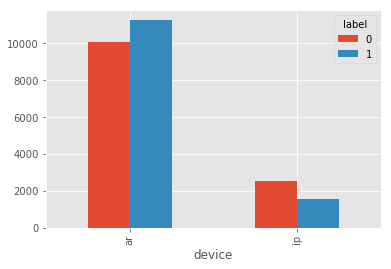

In [36]:
ax = df_device.plot.bar()
plt.show()

    2. Song_type vs. Churn

In [37]:
df_song_type = df_features.groupby(['major_song_type','label']).size().unstack()
df_song_type

label,0,1
major_song_type,,
0,11752,11745
1,778,1002
2,52,56
3,1,3


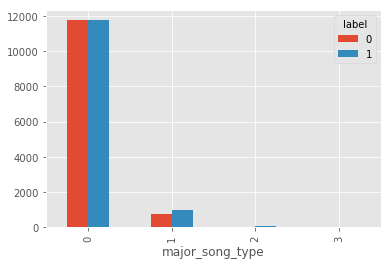

In [39]:
ax = df_song_type.plot.bar()
plt.show()

    3. active_days

In [41]:
df_active_days = df_features.groupby(['active_days','label']).size().unstack().fillna(0)
df_active_days

label,0,1
active_days,,
1,10.0,3.0
2,10.0,3.0
3,20.0,68.0
4,773.0,3154.0
5,766.0,2343.0
6,912.0,1388.0
7,884.0,1280.0
8,832.0,977.0
9,815.0,690.0


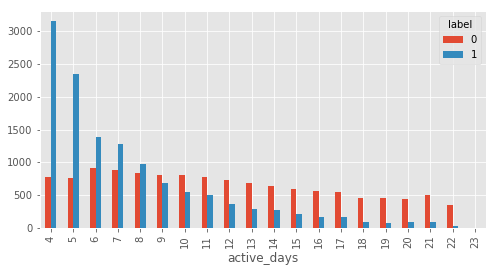

In [150]:
ax = df_active_days.plot.bar()
plt.xlim(2.5,22.5)
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

    4. days_since_last_play

In [44]:
df_days_since_last_play = df_features.groupby(['days_since_last_play','label']).size().unstack()
df_days_since_last_play

label,0,1
days_since_last_play,,
1,6680.0,1709.0
2,2001.0,1078.0
3,1081.0,913.0
4,696.0,767.0
5,442.0,831.0
6,469.0,739.0
7,290.0,625.0
8,153.0,496.0
9,183.0,678.0


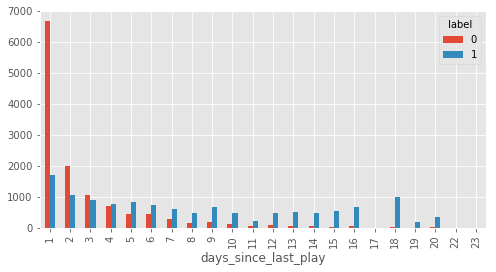

In [151]:
ax = df_days_since_last_play.plot.bar()
plt.show()

    5. total_play_time

In [49]:
df_features.groupby('label').mean()

,uid,total_play_time,popular_songs_ratio,avg_play_time,least_popular_count,most_popular_count,count_play_23,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,active_days,days_since_last_play
label,,,,,,,,,,,,,,
0,1.666357e+08,12707.996705,0.273813,1396.205850,6.837161,127.585314,354.340618,21.265255,0.04567,0.132663,0.301468,0.566110,11.698959,2.732258
1,1.675870e+08,11060.735607,0.315399,5305.225875,3.698032,60.219741,156.144620,138.163994,0.01556,0.050765,0.141293,0.358618,7.414493,8.380056


In [52]:
df_features.total_play_time.describe()

count    2.538900e+04
mean     1.187713e+04
std      3.586473e+05
min      0.000000e+00
25%      1.184667e+02
50%      2.997667e+02
75%      7.198167e+02
max      3.848332e+07
Name: total_play_time, dtype: float64

In [76]:
df_play_time = df_features.loc[:,['total_play_time','label']]
df_play_time.head()

,total_play_time,label
0,1.557662e+07,0
1,3.848332e+07,0
2,5.289638e+06,0
3,6.639750e+03,0
4,4.837500e+02,0


In [95]:
df_play_time['bins'] = list(pd.cut(df_features.total_play_time, bins=range(0,2001,50), 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))

df_play_time.head()

,total_play_time,label,bins
0,1.557662e+07,0,NaN
1,3.848332e+07,0,NaN
2,5.289638e+06,0,NaN
3,6.639750e+03,0,NaN
4,4.837500e+02,0,"[450, 500)"


In [96]:
df_play_time.loc[df_play_time.bins.isnull(),'label'].mean()

0.31660039761431413

In [97]:
df_play_time_bins = df_play_time.groupby(['bins','label']).size().unstack().fillna(0)
df_play_time_bins.head()

label,0,1
bins,,
"[0, 50)",579,1761
"[50, 100)",849,2053
"[100, 150)",932,1663
"[150, 200)",852,1080
"[200, 250)",768,855


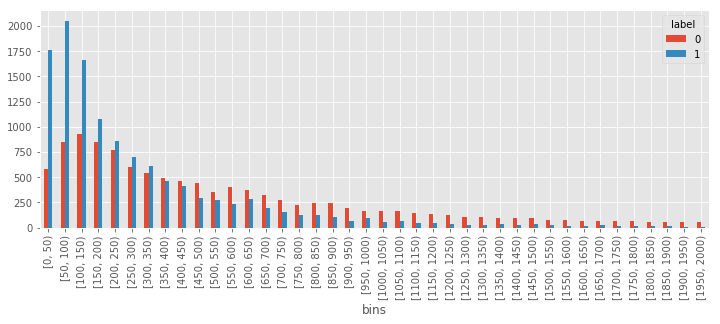

In [155]:
ax = df_play_time_bins.plot.bar()
plt.rcParams["figure.figsize"] = (12,4)
plt.show()

    6. ratios of accelerations

In [108]:
df_features.columns

Index([u'uid', u'device', u'major_song_type', u'total_play_time',
       u'popular_songs_ratio', u'play_time_label', u'avg_play_time',
       u'least_popular_count', u'most_popular_count', u'count_play_23',
       u'avg_complete_ratio', u'ratio_1_over_23', u'ratio_3_over_23',
       u'ratio_7_over_23', u'ratio_14_over_23', u'active_days',
       u'days_since_last_play', u'label'],
      dtype='object')

In [109]:
df_ratios = df_features.loc[:,['ratio_1_over_23', 'ratio_3_over_23','ratio_7_over_23', 'ratio_14_over_23','label']]
df_ratios.head()

,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,label
0,0.037301,0.129155,0.317579,0.613044,0
1,0.000000,0.000000,0.237340,1.000000,0
2,0.017536,0.026607,0.075789,0.833944,0
3,0.137862,0.186314,0.329171,0.692557,0
4,0.000000,0.000000,0.172222,0.430556,0


In [117]:
df_ratios.describe()

,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,label
count,25389.000000,25389.000000,25389.000000,25389.000000,25389.000000
mean,0.030483,0.091355,0.220677,0.461453,0.504392
std,0.077523,0.147363,0.233229,0.301279,0.499991
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.205882,0.000000
50%,0.000000,0.013109,0.163522,0.484375,1.000000
75%,0.024348,0.135314,0.355556,0.693182,1.000000
max,0.925926,1.000000,1.000000,1.000000,1.000000


In [115]:
pd.cut(df_ratios.ratio_1_over_23, bins=np.linspace(0,0.3,61), 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True)

[0.0, 0.005)     17314
[0.005, 0.01)      466
[0.01, 0.015)      448
[0.015, 0.02)      446
[0.02, 0.025)      427
[0.03, 0.035)      375
[0.025, 0.03)      365
[0.035, 0.04)      359
[0.045, 0.05)      351
[0.05, 0.055)      337
[0.04, 0.045)      332
[0.055, 0.06)      274
[0.06, 0.065)      249
[0.065, 0.07)      237
[0.075, 0.08)      195
[0.08, 0.085)      192
[0.07, 0.075)      190
[0.085, 0.09)      173
[0.09, 0.095)      158
[0.095, 0.1)       129
[0.105, 0.11)      120
[0.1, 0.105)       117
[0.11, 0.115)      112
[0.12, 0.125)      100
[0.125, 0.13)       99
[0.115, 0.12)       92
[0.14, 0.145)       82
[0.13, 0.135)       74
[0.135, 0.14)       66
[0.165, 0.17)       64
[0.15, 0.155)       63
[0.145, 0.15)       62
[0.16, 0.165)       61
[0.17, 0.175)       51
[0.185, 0.19)       45
[0.155, 0.16)       45
[0.18, 0.185)       44
[0.205, 0.21)       39
[0.21, 0.215)       39
[0.25, 0.255)       38
[0.175, 0.18)       37
[0.225, 0.23)       36
[0.2, 0.205)        35
[0.22, 0.22

In [127]:
df_1_over_23 = df_features.loc[:,['ratio_1_over_23','label']]
df_1_over_23['bins'] = list(pd.cut(df_ratios.ratio_1_over_23, bins=np.linspace(0.005,0.3,60), 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))
df_1_over_23.head()

,ratio_1_over_23,label,bins
0,0.037301,0,"[0.035, 0.04)"
1,0.000000,0,NaN
2,0.017536,0,"[0.015, 0.02)"
3,0.137862,0,"[0.135, 0.14)"
4,0.000000,0,NaN


In [128]:
df_1_bins = df_1_over_23.groupby(['bins','label']).size().unstack().fillna(0)
df_1_bins.head()

label,0,1
bins,,
"[0.005, 0.01)",382,84
"[0.01, 0.015)",380,68
"[0.015, 0.02)",372,74
"[0.02, 0.025)",355,72
"[0.025, 0.03)",295,72


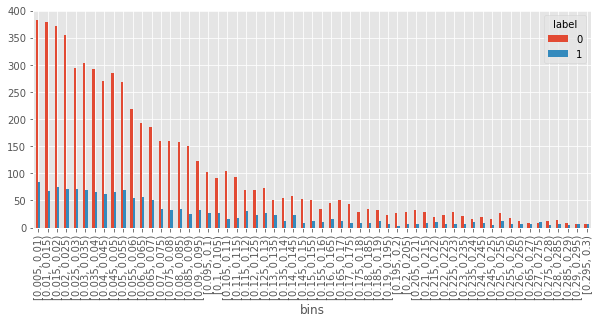

In [129]:
ax = df_1_bins.plot.bar()
#plt.rcParams["figure.figsize"] = (10,4)
plt.show()

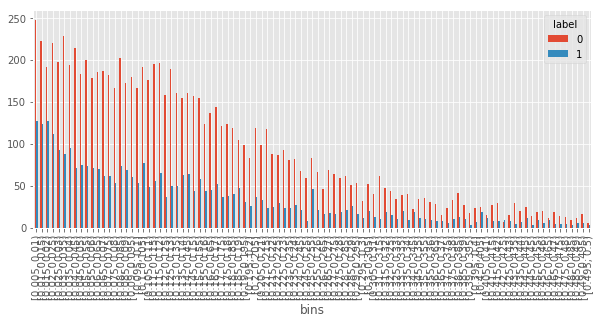

In [135]:
df_3_over_23 = df_features.loc[:,['ratio_3_over_23','label']]
df_3_over_23['bins'] = list(pd.cut(df_ratios.ratio_3_over_23, bins=np.linspace(0.005,0.5,100), 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))
df_3_bins = df_3_over_23.groupby(['bins','label']).size().unstack().fillna(0)
ax = df_3_bins.plot.bar()
#plt.rcParams["figure.figsize"] = (10,4)
plt.show()

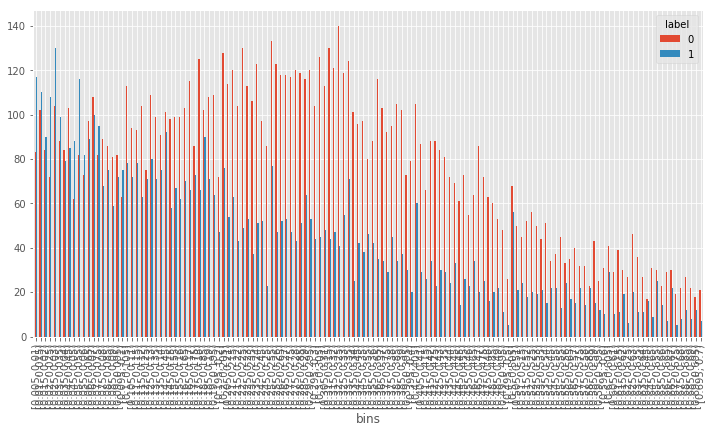

In [139]:
df_7_over_23 = df_features.loc[:,['ratio_7_over_23','label']]
df_7_over_23['bins'] = list(pd.cut(df_ratios.ratio_7_over_23, bins=np.linspace(0.005,0.7,140), 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))
df_7_bins = df_7_over_23.groupby(['bins','label']).size().unstack().fillna(0)
ax = df_7_bins.plot.bar()
plt.rcParams["figure.figsize"] = (12,6)
plt.show()

In [144]:
df_ratios.loc[df_ratios.label == 0].describe()

,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,label
count,12583.000000,12583.000000,12583.000000,12583.000000,12583.0
mean,0.045670,0.132663,0.301468,0.566110,0.0
std,0.086771,0.155953,0.224429,0.250202,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.009091,0.128913,0.396825,0.0
50%,0.006579,0.089552,0.274088,0.582822,0.0
75%,0.056338,0.190532,0.425981,0.750000,0.0
max,0.925926,0.993197,1.000000,1.000000,0.0


In [145]:
df_ratios.loc[df_ratios.label == 1].describe()

,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,label
count,12806.00000,12806.000000,12806.000000,12806.000000,12806.0
mean,0.01556,0.050765,0.141293,0.358618,1.0
std,0.06378,0.125829,0.213638,0.311633,0.0
min,0.00000,0.000000,0.000000,0.000000,1.0
25%,0.00000,0.000000,0.000000,0.036063,1.0
50%,0.00000,0.000000,0.013333,0.322581,1.0
75%,0.00000,0.022463,0.220961,0.597403,1.0
max,0.92500,1.000000,1.000000,1.000000,1.0


In [156]:
filename_pickle = 'C:\\Users\\Sean\\Documents\\BitTiger\\Capston_music_player_python\\modified_features_and_label.pkl'
df_features.to_pickle(filename_pickle)